In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Part 1: The Foundations of Least-Squares Fitting

A more detailed [Introduction to Statistics](https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/main/Sessions/Session01/Day2/IntroStat.pdf) is covered from the Data Science Fellowship Program for graduate students; an introductory review follows.

Today we will focus on a relatively simple problem, while highlighting several challenges for the standard astronomical workflow.

A lot of the lessons in this lecture are inspired by the paper [Data Analysis Recipes: Fitting a Model to Data](https://arxiv.org/abs/1008.4686) by Hogg, Bovy, & Lang. [This paper has been mentioned previously in the DSFP, though today we will only be able to scratch the surface of its content.]

## Problem 1) Data

At the core of everything we hope to accomplish stands a single common connection: data.

There are many things we (may) want to do with these data: reduce them, visualize them, model them, develop predictions from them, use them to infer fundamental properties of the universe (!).

Before we dive into that really fun stuff, we should start with some basics:

**Problem 1a**

Below, I provide some data (in the form of `numpy` arrays). As good data scientists, what is the first thing you should do with this data?

In [2]:
x = np.array([203, 58, 210, 202, 198, 158, 
              165, 201, 157, 131, 166, 160, 
              186, 125, 218, 146])
y = np.array([495, 173, 479, 504, 510, 416, 
              393, 442, 317, 311, 400, 337, 
              423, 334, 533, 344])
sigma_y = np.array([21, 15, 27, 14, 30, 16, 
                    14, 25, 52, 16, 34, 31, 
                    42, 26, 16, 22])

Answer to 1a: Inspect it, visualize it, check it out, <i>look at it!

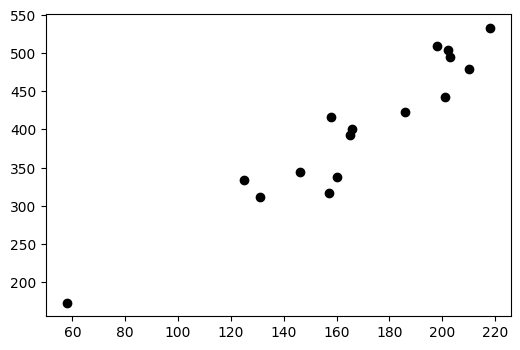

In [3]:
plt.figure(dpi=100)
plt.scatter(x, y, color='k')
plt.show()

## Probelm 2) Fitting a Line to Data

There is a very good chance, though I am not specifically assuming anything, that upon making the previous plot you had a thought along the lines of "these points fall on a line" or "these data represent a linear relationship."  

**Problem 2a** 

Is the assumption of linearity valid for the above data?

Is it convenient?

*Take a few min to discuss this with your partner*

Let us proceed with convenience and assume the data represent a linear relationship. In that case, in order to make predictions for future observations, we need to fit a line to the data. 

The "standard" proceedure for doing so is [least-squares fitting](https://en.wikipedia.org/wiki/Least_squares). In brief, least-squares minimizes the sum of the squared value of the residuals between the data and the fitting function.

We often joke that all you need to be a good data scientist is [google](https://www.google.com) and [stack overflow](https://stackoverflow.com). Via those two tools, we can quickly deduce that the easiest way to perform a linear least-squares fit to the above data is with [`np.polyfit`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html), which performs a least-squares polynomial fit to two `numpy` arrays.

**Problem 2b**

Use `np.polyfit()` to fit a line to the data. Overplot the best-fit line on the data.

2.216656024264677 28.843451929600416


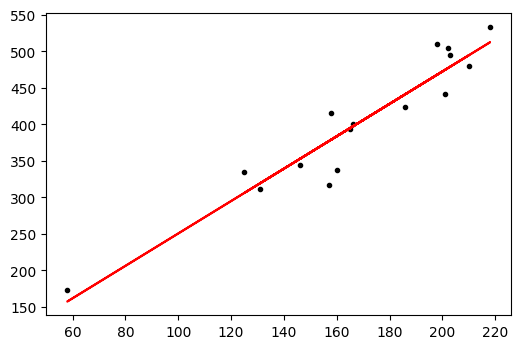

In [4]:
p = np.polyfit(x, y, 1) # complete
y_fit = p[0]*x + p[1]
print(p[0], p[1])

plt.figure(dpi=100)
plt.scatter(x, y, color='k', marker='.')
plt.plot(x, y_fit, color='r')
plt.show()

There is a very good chance, though, again, I am not specifically assuming anything, that for the previous plots that you plotted `x` along the abscissa and `y` along the ordinate. 

[Honestly, there's no one to blame if this is the case, this has essentially been drilled into all of us from the moment we started making plots. In fact, in `matplotlib` we cannot change the name of the abscissa label without adjusting the `xlabel`.]

This leads us to an important question, however. What if `y` does not depend on `x` and instead `x` depends on `y`? Does that in any way change the results for the fit?

**Problem 2c**

Perform a linear least-squares fit to `x` vs. `y` (or if you already fit this, then reverse the axes). As above, plot the data and the best-fit model.

To test if the relation is the same between the two fits, compare the predicted `y` value for both models corresponding to `x = 300`.

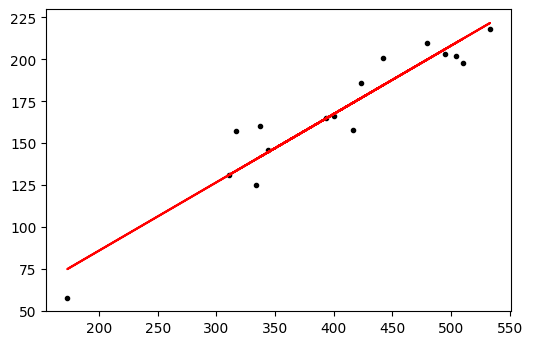

For y vs. x, then x=50 would predict y=139.68
For x vs. y, then x=50 would predict y=111.81


In [5]:
p_yx = np.polyfit(y, x, 1) # complete
x_fit = p_yx[0]*y + p_yx[1]
plt.figure(dpi=100)
plt.scatter(y, x, color='k', marker='.') # complete
plt.plot(y, x_fit, color='r')
plt.show()

solve_for_y_yx = (50 - p_yx[1])/(p_yx[0])
solve_for_y_xy = p[0]*50 + p[1]
print("For y vs. x, then x=50 would predict y={:.2f}".format(solve_for_y_xy)) # complete
print("For x vs. y, then x=50 would predict y={:.2f}".format(solve_for_y_yx)) # complete

So we have now uncovered one of the peculiariaties of least-squares. Fitting `y` vs. `x` is *not* the same as fitting `x` vs. `y`.

There are a couple essential assumptions that go into standard least-squares fitting:

1. There is one dimension along which the data have negligible uncertainties (e.g. if 'x' is 'time when data was taken,' then you may have a near-zero error on each entry of time, because you may know exactly when data was taken).
2. Along the other dimension, **all** of the uncertainties can be described via Gaussians of known variance.

These two conditions are *rarely* met for astronomical data. While condition 1 can be satisfied (e.g., time series data where there is essentially no uncertainty on the time of the observations), I contend that condition 2 is rarely, if ever, satisfied.

Speaking of uncertainties*, we have not utilized any thus far. [I hope this has raised some warning bells.]

We will now re-organize our data to match what is originally in Hogg, Bovy, & Lang (previously `x` and `y` were swapped).

*There is an amazing footnote in Hogg, Bovy, & Lang about "errors" vs. "uncertainties" - I suggest everyone read this.

**Problem 2d**

Re-plot the data including the uncertatines.

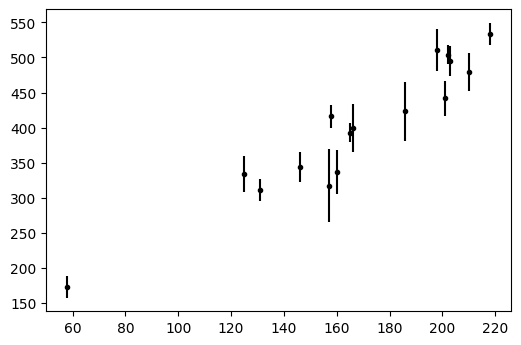

In [6]:
plt.figure(dpi=100)
plt.errorbar(x, y, sigma_y, color='k', marker='.', linestyle='') # complete
plt.show()

We are now assuming that `x` has negligible uncertainties and that `y` has uncertainties that can be perfectly described by Gaussians of known variance.

"Least-squares" provides a deterministic method for determining the best fit, because it comes from the following linear algebra (bear with me).

We can arrange the data in matricies:

$$ \mathbf{Y} = \left[ {\begin{array}{c}
            y_1 \\
            y_2 \\
            \dots \\
            y_N
            \end{array}
           }
            \right] , $$

$$ \mathbf{X} = \left[ {\begin{array}{cc}
            1 & x_1 \\
            1 & x_2 \\
            \dots & \dots \\
            1 & x_N
            \end{array}
           }
           \right] ,
           $$
           
$$ \mathbf{A} = \left[ {\begin{array}{c}
            \text{fitted_parameter_1} \\
            \text{fitted_parameter_2} \\
            \end{array}
           }
           \right] ,
           $$
           
where $\mathbf{Y}$ is a vector of dependent (y) data, $\mathbf{X}$ is a matrix where the first column is a vector of all 1's, and the second column is a vector of the independent (x) data, and finally $\mathbf{A}$ is the vector holding the parameters that we'd like to fit, that we believe could best describe an equation of our data in some way. *Note: this same derivation is on pg. 4 of the Hogg paper linked earlier, but I have swapped definitions of $\mathbf{A}$ and $\mathbf{X}$ because I think it makes more sense to keep the X's together!*

Meanwhile, $\mathbf{C}$ is the [covariance matrix](https://users.cs.utah.edu/~tch/CS4300/resources/refs/ErrorEllipses.pdf), which is literally the variance (error squared) of both axes of data. In cases of negligible x-errors, like time measurements, the only errors left are the dependent data errors. So, the errors in the dependent data are all that we have left, and they fill out the diagonal of the covariance matrix. If the errors on that data are Gaussian, then we refer to the errors as the "sigma" value of the Gaussian. If there *were* major errors in the independent data to keep track of, *and* if the errors in x and y had some sort of dependence on each other (literally co-varying), then the non-diagonal entries in the matrix would be filled out as well. But in the common, simply case of dominant dependent variable errors, the covariance matrix is:
           
$$ \mathbf{C} = \left[ {\begin{array}{cccc}
            \sigma_{y_1}^2 & 0 & \dots & 0 \\
            0 & \sigma_{y_2}^2 & \dots & 0 \\
            \vdots & \vdots & \ddots & \vdots \\
            0 & 0 & \dots & \sigma_{y_1}^2 \\
            \end{array}
           }
           \right] ,
           $$
           
So, we find the best-fitting parameters in $\mathbf{A}$ by solving the equation:

$$\mathbf{Y} = \mathbf{X}\mathbf{A}.$$

I am skipping the derivation, but the solution to this equations is:

$$ \left[ {\begin{array}{c}
            b \\
            m \\
            \end{array}
           }
            \right] = \mathbf{A} = \left[ \mathbf{X}^T \mathbf{C}^{-1} \mathbf{X}\right]^{-1} \left[ \mathbf{X}^T \mathbf{C}^{-1} \mathbf{Y}\right].$$

As noted in Hogg, Bovy, & Lang, this procedure minimizes the $\chi^2$ function, which is the total squared error, after appropriately scaling by the uncertainties:

$$ \chi^2 = \Sigma_{i = 1}^{N} \frac{[y_i - f(x_i)]^2}{\sigma_{y_i}^2} = \left[ \mathbf{Y}  - \mathbf{X}\mathbf{A}\right]^{T} \mathbf{C}^{-1} \left[ \mathbf{Y} - \mathbf{X} \mathbf{A}\right].$$

**Problem 2e** 

Using the linear algebra equations above (i.e. avoid `np.polyfit` or any other similar functions), determine the weighted least-squares best-fit values for $b$ and $m$, the intercept and slope, respectively.

Plot the results of the best-fit line. How does this compare to the above estimates?

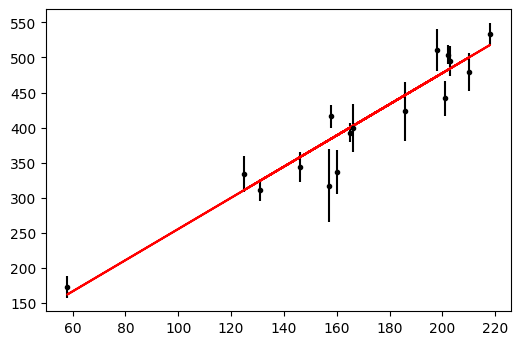

The best-fit value for the slope and intercept are: 2.2214 and 33.4505


In [7]:
Y = np.array(y)
X = np.array((np.ones_like(x), x)).T
sigma_y = sigma_y.astype(float)
C = np.diag(sigma_y)

A = np.linalg.inv(X.transpose() @ np.linalg.inv(C) @ X) @ (X.transpose() @ np.linalg.inv(C) @ Y) # complete

plt.figure(dpi=100)
plt.errorbar(x, y, sigma_y, color='k', marker='.', linestyle='') # complete
plt.plot(x, A[1]*x + A[0], color='r') # complete
plt.show()

print("The best-fit value for the slope and intercept are: {:.4f} and {:.4f}".format(A[1], A[0]))

**Problem 2f**

Confirm the results of this fit are the same as those from `np.polyfit`.

*Hint - include the uncertainties (1/sigma) in the polynomial fit as a weight this time.*

In [8]:
p = np.polyfit(x, y, 1, w = 1/sigma_y) # complete
print("The best-fit value for the slope and intercept are: {:.4f} and {:.4f}".format(p[0], p[1])) # complete

The best-fit value for the slope and intercept are: 2.2399 and 34.0477


## Problem 3) Are the Uncertainties Actually Gaussian?

Previously we noted that there are two essential assumptions that are required for least-squares fitting to be correct. We are now going to examine the latter requirement, namely, that the uncertainties can be perfectly described as Gaussians with known variance.

Earlier I stated this assumption is rarely satisfied. Why might this be the case? 

In my experience (meaning this is hardly universal), if it's astro, it's got systematics. While I cannot prove this, I contend that systematic uncertainties are rarely Gaussian. If you are lucky enough to be in a regime where you can be confident that the systematics are Gaussian, I further contend that it is extremely difficult to be certain that the variance of that Gaussian is known.

Then there's another (astro-specific) challenge: in many circumstances, we aren't actually working with data, but rather with the results of other models applied to the data.

Let's take an optical astronomy example. What are the data? In many cases inference is being based on measurements of brightness, but the true data in this case is simply a bunch of electron counts in a CCD. The brightness (or mag) is based on the application of a model (e.g., PSF, aperture, Kron) that is applied to the data. Thus, to assume that a flux (or mag) measurement has Gaussian uncertainties with known variance is to assume that whatever flux-measurement model has been applied always produces perfectly Gaussian uncertainties (and a lot of different assumptions go into flux-measurement models...)

**Problem 3a**

Using the least-squares methodology developed in Problem 2, determine the best-fit slope and intercept for a line fit to the ***new*** data below. 

Make a scatter plot of the data, and overplot the best-fit line. What if anything, do you notice about the data and the fit?

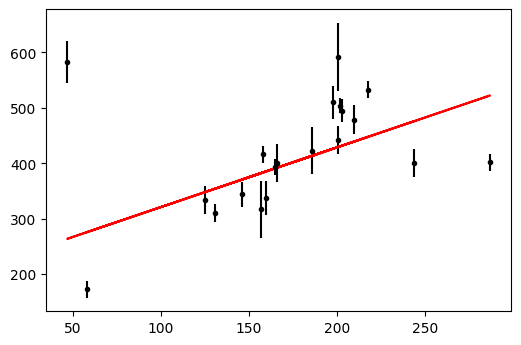

The best-fit value for the slope and intercept are: 1.0767 and 213.2735


In [2]:
x = np.array([201, 201, 287, 166, 58, 157, 146, 218, 203, 186, 160, 47, 210,
       131, 202, 125, 158, 198, 165, 244])
y = np.array([592, 442, 402, 400, 173, 317, 344, 533, 495, 423, 337, 583, 479,
       311, 504, 334, 416, 510, 393, 401])
sigma_y = np.array([61, 25, 15, 34, 15, 52, 22, 16, 21, 42, 31, 38, 27, 16, 14, 26, 16,
       30, 14, 25])

Y = np.array(y)# complete (same as last time, just repeat for the new data)
X = np.array((np.ones_like(x), x)).T
sigma_y = sigma_y.astype(float)
C = np.diag(sigma_y**2)

A = np.linalg.inv(X.transpose() @ np.linalg.inv(C) @ X) @ (X.transpose() @ np.linalg.inv(C) @ Y) # same as before

plt.figure(dpi=100)
plt.errorbar(x, y, sigma_y, color='k', marker='.', linestyle='') # complete
plt.plot(x, A[1]*x + A[0], color='r') # complete
plt.show()
print("The best-fit value for the slope and intercept are: {:.4f} and {:.4f}".format(A[1], A[0])) # complete

### Unlike the data in Problems 1 and 2, there appear to be some significant outliers. Or, this appearance of outliers is entirely dependent upon the assumption of linearity, there may actually be no outliers and a complex relation between `x` and `y`. Either way, this best-fit line does not seem to be a good model for the data.

**Problem 3b**

Perform a least-squares 2nd order polynomial fit to the data. Overplot the bestfit curve.

How does this compare to the linear model fit?

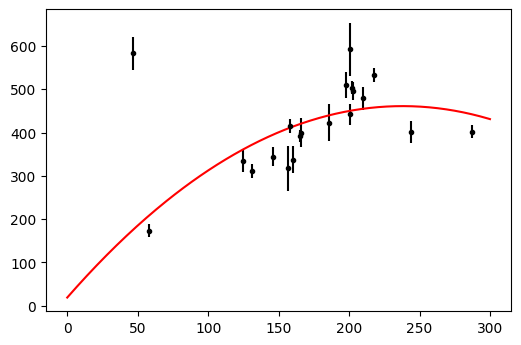

In [4]:
Y = np.array(y)
X = np.array((np.ones_like(x), x, x**2)).T
sigma_y = sigma_y.astype(float)
C = np.diag(sigma_y**2)

A_poly = np.linalg.inv(X.transpose() @ np.linalg.inv(C) @ X) @ (X.transpose() @ np.linalg.inv(C) @ Y) # same as before

plt.figure(dpi=100)
plt.errorbar(x, y, sigma_y, color='k', marker='.', linestyle='') # complete
test_x = np.linspace(0, 300, 300)
plt.plot(test_x, A_poly[2]*test_x**2 + A_poly[1]*test_x + A_poly[0], color='r') # complete
plt.show()

By eye, the quadratic fit appears "better" than the linear fit.

But, there are still "outliers" and in the realm of polynomial fitting, it is always possible to get a better fit by adding more degrees to the polynomial.

[As a reminder - in machine learning we'd call this low training error, but the generalization error is likely huge]

#### How should we deal with these potential outliers?

(and to re-iterate, we cannot be certain that these points are, in fact, outliers)

### Amazingly, if you scroll through the literature you can find solutions like the following: "We do not *believe* the data point at (x, y) for reasons A, B, C. Thus, we exclude that point from the fit."

This, obviously, lacks any sort of rigor. If data is going to be removed, and it is worth asking if data should ever be removed, it should not be subject to the "beliefs" of an individual person or group. 

A more common approach that you might encounter is known as $k\sigma$ clipping, which is an iterative procedure to identify and remove outliers from a data set. The procedure is as follows:

1. Fit the model to the data
2. Identify any data points that are $k\sigma$ discrepant from the best-fit model
3. Remove the discrepant points, repeat steps 1 & 2 until there are no data beyond $k\sigma$

The motivation for this procedure is the following: in a small data set (such as the one above, 20 points), the likelihood of having large $\sigma$ deviations (let's say $k = 5$) is vanishingly small. Thus, it "makes sense" to remove those points. 

Of course, this only makes sense if the uncertainties are truly gaussian with low variance. So again, specific, and likely untrue, assumptions have to be made. 

**Problem 3c**

Develop a $k\sigma$ clipping procedure to fit a line to the data set. Set $k = 5$ and determine the best-fit line to the data. 

Overplot the results of the procedure on the data. How does this fit to the data look?

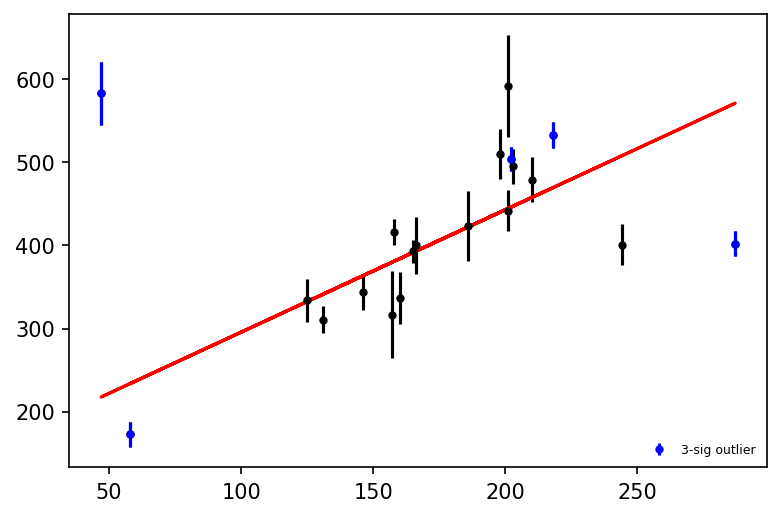

The best-fit value for the slope and intercept are: 1.0767 and 213.2735


In [5]:
def k_clip(x, y, err, k_start=5):
    good_is = np.ones_like(y).astype(bool)
    n_remove = 1

    while n_remove > 0:
        Y = np.array(y[good_is])
        X = np.array((np.ones_like(x[good_is]), x[good_is])).T
        C = np.diag(err[good_is]**2)
    
        A = np.linalg.inv(X.transpose() @ np.linalg.inv(C) @ X) @ (X.transpose() @ np.linalg.inv(C) @ Y) # complete
        
        fit_y = A[1]*x + A[0]
        k_per = np.abs((y - fit_y)/err)
        bad_is = np.logical_and(k_per >= k_start, good_is==1)
    
        n_remove = sum(bad_is)
        good_is[bad_is] = 0
        
    return(good_is, A)

good_is, A_5 = k_clip(x, y, sigma_y)
plt.figure(dpi=150)
plt.errorbar(x, y, sigma_y, color='k', marker='.', linestyle='') # complete
plt.errorbar(x[good_is == False], y[good_is == False], 
             sigma_y[good_is == False], color='b', marker='.', linestyle='', label = "3-sig outlier")
plt.plot(x, A_5[1]*x + A_5[0], color='r') # complete
plt.legend(frameon=False, loc='lower right', fontsize=6)
plt.show()

print("The best-fit value for the slope and intercept are: {:.4f} and {:.4f}".format(A[1], A[0]))

By eye, the results above are not that satisfying. Some of those points do look like outliers, but there are also 2 points being rejected that are well within the other cluster of data.

Furthermore, the point at $(x, y) \approx (60, 170)$ was clipped in an early iteration of the algorithm, but now with the final model this point is actually within $k\sigma$ of the best-fit line. What should one do with points like this?

This is one of the great problems with $k\sigma$ clipping: how does one select the appropriate value for $k$?

Even if there was a good heuristic argument for selecting $k$, is there fundamentally any difference between an observation that is $k\sigma + \epsilon$ away from the model versus a point at $k\sigma - \epsilon$, where $\epsilon \ll 1$? Any choice of $k$ will automatically remove one of these points and not the other, which seems somewhat arbitrary...

**Problem 3d**

Perform the $k\sigma$ procedure on the data, but this time set $k = 7$. Plot the results as above.

How do these results compare to our previous fits?

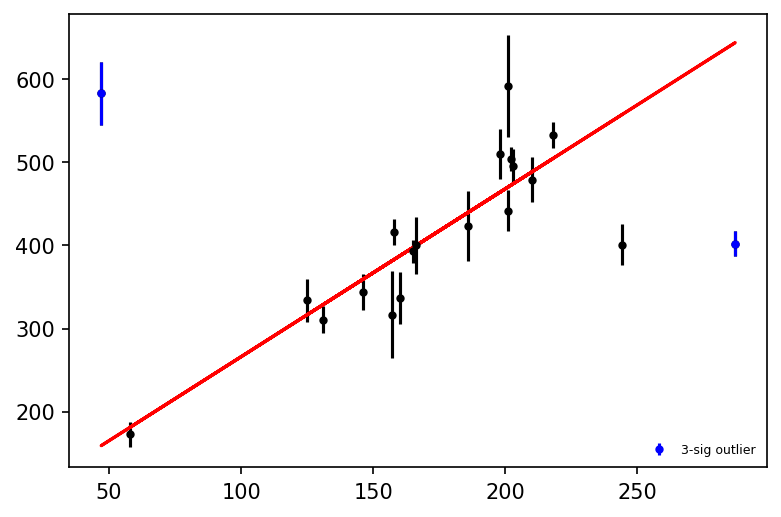

In [6]:
good_is, A_7 = k_clip(x, y, sigma_y, k_start=7)
plt.figure(dpi=150)
plt.errorbar(x, y, sigma_y, color='k', marker='.', linestyle='') # complete
plt.errorbar(x[good_is == False], y[good_is == False], 
             sigma_y[good_is == False], color='b', marker='.', linestyle='', label = "3-sig outlier")
plt.plot(x, A_7[1]*x + A_7[0], color='r') # complete
plt.legend(frameon=False, loc='lower right', fontsize=6)
plt.show()

By eye, this *appears* superior to the previous fit. At the same time, we have not actually optimized anything to definitively show that this is the case.

If there are outliers in the data, then it stands to reason that the uncertainties are likely not correctly estimated.

**Problem 3e**

Perform the $k\sigma$ procedure on the data, with $k = 5$, but the variance increased by a factor 4 (i.e. `sigma_y` increased by a factor of 2). Plot the results as above.

How do these results compare to our previous fits?

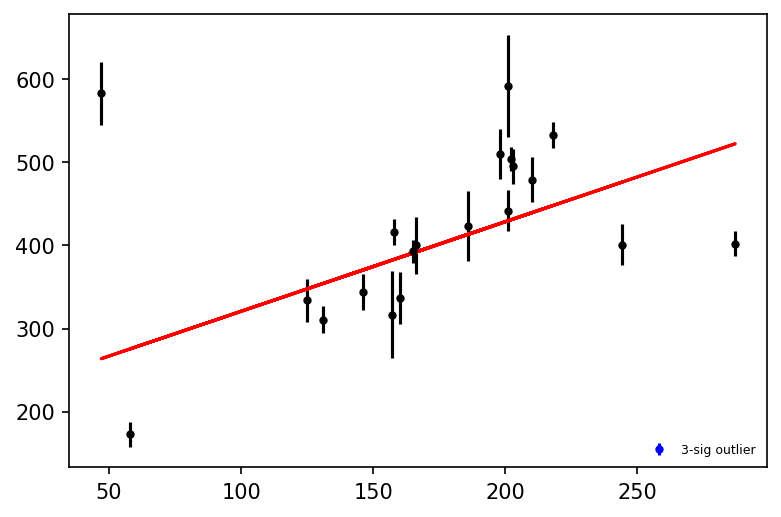

In [7]:
good_is, A_5_doublesig = k_clip(x, y, sigma_y*2, k_start=5)

plt.figure(dpi=150)
plt.errorbar(x, y, sigma_y, color='k', marker='.', linestyle='') # complete
plt.errorbar(x[good_is == False], y[good_is == False], 
             sigma_y[good_is == False], color='b', marker='.', linestyle='', label = "3-sig outlier")
plt.plot(x, A_5_doublesig[1]*x + A_5_doublesig[0], color='r') # complete
plt.legend(frameon=False, loc='lower right', fontsize=6)
plt.show()

If the uncertainties were underestimated then none of the data get clipped from the fit!

I assume (and I hope I've convinced you that assumptions are dangerous) that if you have worked with astronomical data that at one point or another you have (i) encountered data that appear to have outliers, and/or (ii) plotted data in 2 dimensions and then performed a (least-squares) linear fit to that data.

If that is true, I sincerely hope you have the following two thoughts:

1. Crap, crap, crap - I really messed up my paper on [*REDACTED*].
2. There has to be a better way!

First, let's address point 1. Don't freak out. Yes, it is probably the case that some work somewhere was not completed in the absolute most rigorous fashion possible. This is okay (and I feel fairly confident saying everyone has done it. There are definitely examples of each of the "bad" things described above in *my* papers if you go back and look hard enough.)

There are even some situations where the above prescriptions are appropriate and preferred (think engineering solutions as opposed to strict scientific inference). 

More importantly - point 2: there is a better way. Especially for the data/problem that we have been investigating above.

In particular, we can take a Bayesian approach to the problem, whereby we define a generative model that allows us to compute the likelihood of the observations. The computation of the likelihood or posterior probability distribution requires complex integrals, but this is possible using sophisticated sampling techniques.

The combination of each of these tools provides a far more satisfying result than the various procedures previously discussed in this lecture. 

# Part 2: Bayesian Model Fitting

## Minimizing $\chi^2$

As shared before, the common first-order procedure for fitting data is to minimize the "chi squared" in order to identify the "best-fit" parameters of a model: 

$$ \chi^2 = \Sigma_{i = 1}^{N} \frac{\left[y_i - f(x_i)\right]^2}{\sigma_{y_i}^2},$$

where $f(x)$ is the model for the data, such as $f(x) = mx + b$, or a polynomial, or a Gaussian!

A least-squares fit, such as the ones used above, minimizes the value of $\chi^2$, which in turn provides a "best-fit" estimate of fitted parameters like $m$ and $b$.

Note: FWIW, we usually write our code to minimize chi^2 by coding up the above equation literally, not by completing matrix multiplication. It's usually just a little easier to read the code that way, not to mention easier to understand the physical implications of why we want to minimize this value. But now that you've done the matrix method, you'll always know the mathematical justification for minimizing chi-2!

## Maximizing the Likelihood

Alternatively, we could consider a probabilistic model, in which case the probability of any observation $y_i$ is dependent on $x_i$, our model $f(x)$, and some scatter (error, sigma) associated with the measurement itself $\sigma_{yi}$. In a sample of independent and identically distributed draws from a normal distribution, the probability density function of drawing your measurement $y_{i}$ is:

$$ p\left(y_i\, | \, x_i, \sigma_{yi}, f(x_i) \right) = \frac{1}{\sqrt{2\pi\sigma_{y_i}^2}}\,\exp\left(-\frac{\left[y_i - f(x_i)\right]^2}{2\,\sigma_{y_i}^2} \right).$$

An alternative to $\chi^2$ minimization is to *maximize* the probability of each observed data point given the model, which is then to say we want to maximize the likelihood of *all* the observed data given the model. When considering the total chance of something after many times (repeated rolls of a dice, successive observations of data), the probability of each individual thing (each dice roll, each observation) is multiplied in succession. Thus we can write the **likelihood function** $\mathscr{L}$ as the product of the probability of every observation:

$$ \mathscr{L} = \prod_{i=1}^{N} p\left(y_i\, |\, x_i, \sigma_i, f(x_i) \right)$$

This product is often difficult to evaluate, so we often take the logarithm of the likelihood so that we're only dealing with a sum, and maximize that. In this case we get:

$$ \ln \mathscr{L} = K - \sum_{i=1}^{N} \frac{\left[y_i - f(x_i) \right]^2.}{2\sigma_{yi}^2} 
   = K - \frac{1}{2}\chi^2 $$
   
where $K$ is some constant. As you can see, maximizing the likelihood (in this case) is equivalent to minimizing $\chi^2$.

Note: an important assumption in all of this is that the uncertainties, $\left(\sigma_x, \sigma_y\right)$, are Gaussian. As we've seen, this can be reasonable, but it is worth keeping in mind.

Finally, we can (and whenever possible, probably should) generalize this method to include what is called a ***Bayesian*** framework. Bayes' theorem says:

$$ p(A\, | \,B) = \frac{p(B\, | \,A) p(A)}{p(B)} $$

Which, in real words, says the probability of $A$ happening, *given $B$ happened*, is equal to the probability of $B$ happening given $A$ happened, *and* (multiplied by) the probability of $A$ happening at all, divided by the probability of $B$ happening at all.

We call the left hand side, $p(A\, | \,B)$, the **posterior**, while $p(B\, | \,A)$ is the **likelihood** (yes, the same likelihood as the equation we found above!), and finally $p( A )$ is the **prior**. Notice that when we work in log-space these will all just be sums instead of multiplication, again easier to compute!

So, we want to know the the posterior (aka the probability distribution) for the parameters in $A$ (which $= (m,b)$ in the case of fitting a straight line), given the data $B$ and any prior knowledge about it.

The denominator can be thought of as a normalization constant that most people ignore (and we will also ignore it). In this case, we are left with just the likelihood, which we already defined above, multiplied by the prior information, which may be

Writing this in code can look as follows:

In [71]:
# compute the log likelihood
def lnlike(theta, x, y, yerr):
    '''
    "theta" is typically the variable name we use for 
    the parameters we're trying to fit.
    (You can use another name if you prefer!)
    You will also define the model function,
    e.g. here we've set model = m*x + b.
    (Yes, if your model function is more complicated, 
    it can also be defined externally, and used here.)
    Then we use the parameters and the function in the 
    chi-squared equation, 
    '''
    m, b = theta # yes, one variable name passed to a function can stand in for multiple variables!
    model = m*x + b
    ln_l = np.sum( np.log( 1./np.sqrt(2*np.pi * yerr**2.) * np.exp(-0.5*((y - model)/yerr)**2) ) )
    
    #in case the ln_l equation returns a list-of-a-list, 
    #.squeeze() just gets us the innermost list of information:
    return -ln_l.squeeze() 

# compute the log prior
def lnprior(theta):
    '''
    We tend to write the ln(prior) as something like a top-hat function:
    Our prior information may tell us whether we should even bother
    looking at some parameters before others.
    E.g., our data may not even be best fit by a line, 
    but if it *is* a line, we may know that logically 
    it can't have a negative slope.
    So, if the parameters of the model are within 
    a possible range, we return 0 (because the log of something)
    and if not, we return negative infinity (ensuring 
    that whatever the log-likelihood is, it will be weighed 
    down by the prior, preventing it from being our maximumm solution).
    '''
    m, b = theta
    if ( (0 < m < 3) and (-100 < b < 200) ):
        return 0.0
    return -np.inf

# compute (the log of) the likelihood multiplied by the prior
def lnprob(theta, x, y, yerr):
    '''
    Combining the two! Compute the likelihood and prior,
    and if both are physically feasible (not infinite), add them together.
    This is what we want to maximize!
    '''
    lnp = lnprior(theta)
    lnl = lnlike(theta,  x, y, yerr)
    if (not np.isfinite(lnp) or not np.isfinite(lnl)):
        return -np.inf
    return (lnp + lnl)

Now, as a check, let's try to maximize the likelihood (without worrying about the prior yet) with scipy and confirm that we get the same results as the least-squares procedure described above (notice that we've actually written lnlike to return a negative value - minimizing a negative is an easier computational task than maximizing a positive).

In [95]:
from scipy.optimize import minimize

p = np.polyfit(x, y, 1, w = 1/sigma_y)

guess0 = np.array([p[0], p[1]])
scFit = minimize(lnlike, guess0, args=(x, y, sigma_y))
print(scFit.message)
print("The initial guess for the slope and intercept are: {:.4f} and {:.4f}"\
      .format(guess0[0], guess0[1]))#guess0[0], guess0[1]))
print("The best-fit value for the slope and intercept are: {:.4f} and {:.4f}".format(scFit.x[0], scFit.x[1]))


Optimization terminated successfully.
The initial guess for the slope and intercept are: 1.0767 and 213.2735
The best-fit value for the slope and intercept are: 1.0767 and 213.2735


Are the initial guesses and best-fit values the same? In fact, are they *too* similar? Try applying a random shift to our initial guesses by including $\texttt{*2*np.random.random()}$ outside of the np.array for guess0, and see if you still get the same best-fit value from minimizing. Then you'll see that indeed, this method gets us the same m,b values as our earlier attempts at minimizing chi-squared via matrix math!

## *emcee*

Now, let's use *[emcee](http://dfm.io/emcee/current/)*, a pure-Python implementation of [Goodman & Weare’s Affine Invariant Markov chain Monte Carlo (MCMC) Ensemble sampler](https://msp.org/camcos/2010/5-1/p04.xhtml) written by [Dan Foreman-Mackey](http://dfm.io/).

[MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) draws samples from a probability distribution, and the following Reddit explanation from r/ExplainLikeImFive may be helpful:
<img src='data/ELI5_MCMC.png'>

You may also want to read [this journal article about emcee](https://arxiv.org/abs/1202.3665).

In short, we can use *emcee* to sample the posterior distribution that is defined by a Bayesian likelihood and priors. *emcee* will use a number of "walkers" to explore this parameter space, each sampling around the maximum of the likelihood function (while accounting for the priors). The combination of the paths that each of these walkers take, i.e. their "chains", define the posterior distribution, and provide us with probability distributions for each of the model parameters.

In [100]:
import emcee

nwalkers = 100
nfac = [1e-1, 1e-1]
ndim = len(guess0)
pos = [guess0 + nfac * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, sigma_y))
nsamples = 1000
foo = sampler.run_mcmc(pos, nsamples)

To explore the output:

In [101]:
# set a "burn-in" limit
nburn = 200
m_samples = np.array(sampler.chain[:,nburn:,0]).flatten()
b_samples = np.array(sampler.chain[:,nburn:,1]).flatten()

#print the results taking 1-sigma confidence intervals
samples = np.vstack([m_samples, b_samples]).T
m_mcmc, b_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))
print("emcee results with 1-sigma uncertainties\n \
      m = {:.4f} +{:.4f} -{:.4f}\n \
      b = {:.4f} +{:.4f} -{:.4f}\n" \
      .format(m_mcmc[0], m_mcmc[1], m_mcmc[2], b_mcmc[0], b_mcmc[1], b_mcmc[2]))

emcee results with 1-sigma uncertainties
       m = 1.0870 +0.0816 -0.1221
       b = 213.2740 +0.1076 -0.1108



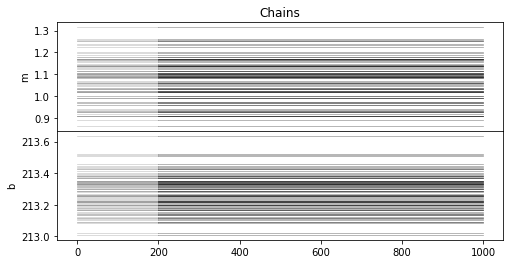

In [102]:
#some function to make plots
#to see the chains
def plotChains(sampler, nburn, paramsNames):
    Nparams = len(paramsNames)
    fig, ax = plt.subplots(Nparams,1, figsize = (8,2*Nparams), sharex = True)
    fig.subplots_adjust(hspace = 0)
    ax[0].set_title('Chains')
    xplot = range(len(sampler.chain[0,:,0]))

    for i,p in enumerate(paramsNames):
        for w in range(sampler.chain.shape[0]):
            ax[i].plot(xplot[:nburn], sampler.chain[w,:nburn,i], color="0.5", alpha = 0.4, lw = 0.7, zorder = 1)
            ax[i].plot(xplot[nburn:], sampler.chain[w,nburn:,i], color="k", alpha = 0.4, lw = 0.7, zorder = 1)
            ax[i].set_ylabel(p)
            
    return ax

paramsNames = ['m','b']

axC = plotChains(sampler, nburn, paramsNames)

## Plot it all together!

Text(0.5, 0, 'x')

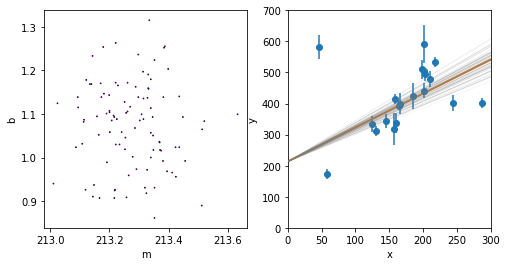

In [107]:
m_samples = np.array(sampler.chain[:,600:,0]).flatten()
b_samples = np.array(sampler.chain[:,600:,1]).flatten()

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))

ax1.hexbin(b_samples, m_samples, gridsize = 250, bins = "log", mincnt = 1)
ax2.errorbar(x, y, sigma_y, fmt = "o")
ax2.set_xlim(0,300)
ax2.set_ylim(0,700)

max_prob = np.argmax(sampler.flatlnprobability)
m_max = sampler.flatchain[:,0][max_prob]
b_max = sampler.flatchain[:,1][max_prob]
ax2.plot([0,300], [b_max + 0*m_max, b_max + 300*m_max], lw = 2)

for rand_draw in np.random.randint(100, len(sampler.flatchain[:,0]), 100):
    m_draw = sampler.flatchain[:,0][rand_draw]
    b_draw = sampler.flatchain[:,1][rand_draw]
    ax2.plot([0,300], [b_draw + 0*m_draw, b_draw + 300*m_draw],
             color = "0.5", alpha = 0.1, zorder = 12, lw = 0.7)

ax1.set_xlabel("m")
ax1.set_ylabel("b")
ax2.set_ylabel("y")
ax2.set_xlabel("x")